In [1]:
import matplotlib.pyplot as plt
import numpy as np

def forward(x, w):
    return x * w

def loss(x, y, w):
    return (forward(x, w)- y) ** 2

def aveList(arr):
    return sum(arr)/ len(arr)

def calGradient(x, y, w):
    return 2 * x * (x * w -y)

w = 1.0

#read data from file
f = open("data.txt", "r")
x_list = list()
y_list = list() 

for i in range(3):
    row = f.readline()
    a = row.split()
    x_list.append(int(a[0]))
    y_list.append(int(a[1]))
f.close()
 


In [2]:
print("predict (before training)", "4 hours", forward(4, w))
w = 1.0
for epoch in range(10):
    for x,y in zip(x_list, y_list): 
        grad = calGradient(x, y, w)
        print("\tgrad: ", x, y, w, grad) 
        w = w - 0.01 * grad
        l = loss(x, y, w)
    print("progress:", epoch, "w=", w, "loss=", l)
    
print("predict (after training)", "4 hours", forward(4, w))



predict (before training) 4 hours 4.0
	grad:  1 2 1.0 -2.0
	grad:  2 4 1.02 -7.84
	grad:  3 6 1.0984 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1 2 1.260688 -1.478624
	grad:  2 4 1.27547424 -5.796206079999999
	grad:  3 6 1.3334363008 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1 2 1.453417766656 -1.093164466688
	grad:  2 4 1.4643494113228799 -4.285204709416961
	grad:  3 6 1.5072014584170494 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1 2 1.5959051959019805 -0.8081896081960389
	grad:  2 4 1.603987091983941 -3.1681032641284723
	grad:  3 6 1.6356681246252256 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1 2 1.701247862192685 -0.59750427561463
	grad:  2 4 1.7072229049488312 -2.3422167604093502
	grad:  3 6 1.7306450725529248 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1 2 1.7791289594933983 -0.44174208101320334

predict (before training) 4 hours 20.0
predict (after training) 4 hours -65.12315474872317


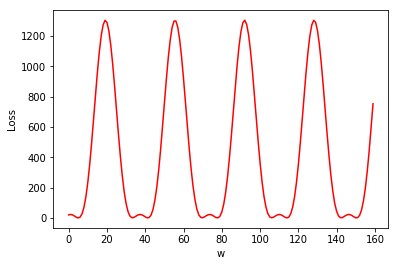

In [33]:
import numpy as np


w1 = 1.0
w2 = 1.0

def forward2(x, w1, w2):
    return x*x*w2 + x*w1 

def loss2(x, y, w1, w2):
    y_pre = forward2(x, w1, w2)
    return (y_pre- y)*(y_pre- y)
    
def calGradientW1(x, y, w1, w2):
    return 2 * x * (w1* (x**2) - w2*x  - y)

def calGradientW2(x, y, w1, w2):
    return 2 * (x **2 )* (w1* (x**2) - w2*x  - y)

 


print("predict (before training)", "4 hours", forward2(4, w1, w2))

loss_list = list()
w1_list = list()
w2_list = list()
length = len(x_list)
for count in np.arange(-6,10,0.1):
    sumLoss = 0;
    for x,y in zip(x_list, y_list): 
        grad1 = calGradientW1(x, y, w1, w2)
        grad2 = calGradientW2(x, y, w1, w2)
        w1 = w1 - (0.01 * grad1)
        w2 = w2 - (0.01 * grad2)
        l = loss2(x, y, w1, w2)
#         print("progress:", count, "w=", w, "loss=", l,grad1, grad2)
        sumLoss += l
    loss_list.append(sumLoss / length)
    w1_list.append(w1)
    w2_list.append(w2)

print("predict (after training)", "4 hours", forward2(4, w1, w2))


plt.plot(loss_list,'r-')
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()